In [11]:
# Dependencies
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
from pprint import pprint

In [12]:
show = "The Office"

# TV Maze show search base URL
base_url = "http://api.tvmaze.com/search/shows?q="

target_url = base_url + show


In [13]:
target_url

'http://api.tvmaze.com/search/shows?q=The Office'

In [19]:

response = requests.get(target_url).json()

pprint (response[0]['show'])

{'_links': {'previousepisode': {'href': 'https://api.tvmaze.com/episodes/711203'},
            'self': {'href': 'https://api.tvmaze.com/shows/526'}},
 'averageRuntime': 30,
 'dvdCountry': None,
 'ended': '2013-05-16',
 'externals': {'imdb': 'tt0386676', 'thetvdb': 73244, 'tvrage': 6061},
 'genres': ['Comedy'],
 'id': 526,
 'image': {'medium': 'https://static.tvmaze.com/uploads/images/medium_portrait/481/1204342.jpg',
           'original': 'https://static.tvmaze.com/uploads/images/original_untouched/481/1204342.jpg'},
 'language': 'English',
 'name': 'The Office',
 'network': {'country': {'code': 'US',
                         'name': 'United States',
                         'timezone': 'America/New_York'},
             'id': 1,
             'name': 'NBC',
             'officialSite': 'https://www.nbc.com/'},
 'officialSite': 'http://www.nbc.com/the-office',
 'premiered': '2005-03-24',
 'rating': {'average': 8.5},
 'runtime': 30,
 'schedule': {'days': ['Thursday'], 'time': '21:00'},
 

In [20]:
pprint (response[0]['show']['rating']['average'])

8.5


In [21]:
pprint (response[0]['show']['name'])

'The Office'


In [6]:
# list of TV show titles to query
tv_shows = ["Modern Family", "Arrested Development", "Breaking Bad", "The Flash","Office",
            "Vikings", "The Mandalorian", "Last of Us", "Peaky Blinders", "Big Bang Theory"]

# TV Maze show search base URL
base_url = "http://api.tvmaze.com/search/shows?q="

# set up lists to hold response data for name and rating
titles = []
ratings = []

# loop through TV show titles, make requests and parse
for show in tv_shows:
    target_url = base_url + show
    response = requests.get(target_url).json()
    titles.append(response[0]['show']['name'])
    ratings.append(response[0]['show']['rating']['average'])

In [7]:
titles

['Modern Family',
 'Arrested Development',
 'Breaking Bad',
 'The Flash',
 'The Office',
 'Vikings',
 'The Mandalorian',
 'The Last of Us',
 'Peaky Blinders',
 'The Big Bang Theory']

In [8]:
ratings

[7.7, 8.3, 9.3, 7.6, 8.5, 8.6, 8.6, 8.3, 8.5, 8]

In [9]:
# create DataFrame
shows_df = pd.DataFrame({
    "title": titles,
    "rating": ratings
})

shows_df

,title,rating
0,Modern Family,7.7
1,Arrested Development,8.3
2,Breaking Bad,9.3
3,The Flash,7.6
4,The Office,8.5
5,Vikings,8.6
6,The Mandalorian,8.6
7,The Last of Us,8.3
8,Peaky Blinders,8.5
9,The Big Bang Theory,8.0


<Axes: xlabel='title'>

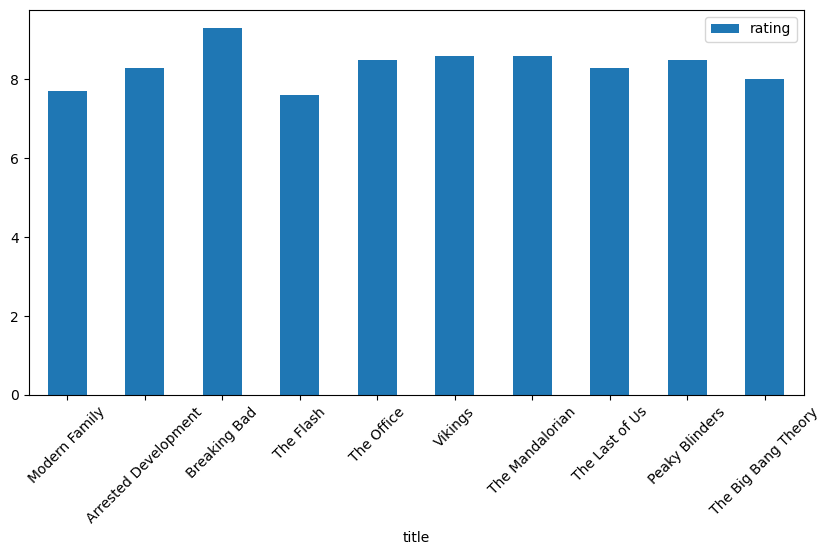

In [10]:
# Plot the data
shows_df.plot('title', 'rating', kind='bar', figsize=(10,5), rot=45)